In [2]:
use regression_analysis_ind_with_ent_sent_march9.dta, clear

In [8]:
su avg_sen*


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
avg_sent_s~e |      7,528    .4119695    .3577352     -.8268      .9576
avg_sent_s~t |      7,528    .5938574    .2537537          0    .886075
avg_sent_s~s |      7,528    .5615071    .2830419     -.5994      .9576


In [9]:
su ent_*


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
     ent_mkt |      4,900    .2234176    .1815654          0    1.05492
  ent_others |      4,900    .2098061    .1864398          0   1.070593
    ent_self |      4,900    .0937851    .2147703          0   1.209574
ent_others~n |      4,900   -.0149312    .1864398  -.2247373   .8458561
ent_self_d~n |      4,900   -.0043575    .2147703  -.0981426   1.111431
-------------+---------------------------------------------------------
ent_oth~n_sq |      4,900    .0349756    .0697801   6.92e-10   .7154725
ent_self_d~q |      4,900    .0461358    .1108806   .0001067    1.23528
ent_oth~s_sq |      4,900    .0787713    .1317517          0    1.14617


## solve some data irregularities 

In [6]:
replace ent_self=1 if (ent_self>=1&ent_self!=.)
replace ent_others=1 if (ent_others>=1&ent_others!=.)
 


(16 real changes made)

(17 real changes made)


In [3]:
egen mean_ent_self = mean(ent_self)
replace ent_self_demean=ent_self-mean_ent_self



(4,900 real changes made)


In [4]:
egen mean_ent_others = mean(ent_others)
replace ent_others_demean=ent_others-mean_ent_others



(4,900 real changes made)


## make labels and create demeaned vars

In [5]:

label variable ent_self_demean "Rating_Entropy_Self"
label variable ent_self "Rating_Entropy_Self"
label variable ent_others_demean "Rating_Entropy_Others"
label variable ent_others "Rating_Entropy_Others"
label variable avg_v2_demean "Average_Rating_Self"
label variable avg_v2 "Average_Rating_Self"
label variable avgmean_others_demean "Average_Rating_Others"
label variable avgmean_others "Average_Rating_Others"
label variable reviews_ct "Review_Count"
label variable log_experience "Experience"
label variable temp_own_price_diff_other "Price_Difference"
label variable log_zip_rev "Market_LogRevenue"
label variable ent_others_sq  "Rating_Entropy_Others^2"
label variable ent_self_demean_sq "Rating_Entropy_Self^2"
label variable log_quotes "Installer Activity Level"

In [6]:
su avg_sent_score


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
avg_sent_s~e |      7,528    .4119695    .3577352     -.8268      .9576


In [6]:
gen avg_sent_score_demean=avg_sent_score-.4119695
label variable avg_sent_score_demean "Average_Sentiment_Self"
gen avg_sent_score_others_demean=avg_sent_score_others- .5615071
label variable avg_sent_score_others_demean "Average_Sentiment_Others"
gen text_d_self_p50_demean=text_d_self_p50-0.0635868
label variable text_d_self_p50_demean  "Text-based_Entropy_Self"
gen text_d_others_p50_demean=text_d_others_p50-0.1245589
label variable text_d_others_p50_demean "Text-based_Entropy_Others"








(1,466 missing values generated)



# regular regression , quantitative measures, demeaned
- with areg (stata command), demeaned,  to get better R-square 

## Hausman for regular regression

In [239]:
global iv_12_demean "avg_v2_demean missing_avg reviews_ct  avgmean_others_demean  ent_others_demean ent_self_demean  c.ent_others_demean#c.ent_others_demean  c.ent_self_demean#c.ent_self_demean log_experience temp_own_price_diff_other missing_price_info log_zip_rev i.state_n "  

qui:xtreg f.log_quotes  $iv_12_demean  , fe
estimates store fixed 
qui:xtreg f.log_quotes $iv_12_demean   , re 
estimates store random
hausman fixed random








                 ---- Coefficients ----
             |      (b)          (B)            (b-B)     sqrt(diag(V_b-V_B))
             |     fixed        random       Difference          S.E.
-------------+----------------------------------------------------------------
avg_v2_dem~n |    -.799588     -.683297        -.116291        .0493315
 missing_avg |   -1.336865    -1.111367       -.2254975        .0985583
  reviews_ct |    .0404208     .0423659       -.0019451        .0014523
avgmean_ot~n |   -.0053489    -.0081832        .0028343        .0033711
ent_others~n |    .5944657     .7339747        -.139509        .0555289
ent_self_d~n |    2.153757     2.024333        .1294243        .1259038
          c. |
ent_others~n#|
          c. |
ent_others~n |   -2.731651    -2.818939        .0872877        .1224304
          c. |
ent_self_d~n#|
          c. |
ent_self_d~n |   -4.281216    -3.751661       -.5295548        .2433379
log_experi~e |    .2131556     .1926724        .0204832     

In [6]:
global iv_0_demean "avg_v2_demean missing_avg reviews_ct  avgmean_others_demean   log_experience temp_own_price_diff_other missing_price_info log_zip_rev i.state_n "  
global iv_11_demean "avg_v2_demean missing_avg reviews_ct  avgmean_others_demean  ent_others_demean c.ent_others_demean#c.ent_others_demean  log_experience temp_own_price_diff_other missing_price_info log_zip_rev i.state_n "  
global iv_12_demean "avg_v2_demean missing_avg reviews_ct  avgmean_others_demean  ent_others_demean ent_self_demean  c.ent_others_demean#c.ent_others_demean  c.ent_self_demean#c.ent_self_demean log_experience temp_own_price_diff_other missing_price_info log_zip_rev i.state_n "  

eststo clear 
preserve
drop if ent_others_demean==.


qui:areg f.log_quotes  $iv_0_demean   , absorb( installer_id) vce(robust)
eststo
qui:areg f.log_quotes $iv_11_demean    , absorb( installer_id) vce(robust)
eststo
qui:areg f.log_quotes  $iv_12_demean  , absorb( installer_id) vce(robust)
eststo
restore
esttab est1 est2 est3 ,  order(  ent_self* c.ent_self* ent_other* c.ent_other* avg_v2_demean avgmean_others_demean) drop(*state* missing* ) p  label  scalars(r2 aic bic)

//esttab est1 est2 est3 using reg_ind_bigtable_areg.csv ,  order(  ent_self* c.ent_self* ent_other* c.ent_other* avg_v2_demean avgmean_others_demean) drop(*state* missing* ) p  label  scalars(r2 aic bic)







(2,628 observations deleted)


(est1 stored)


(est2 stored)


(est3 stored)



--------------------------------------------------------------------
                              (1)             (2)             (3)   
                     F.Installe~l    F.Installe~l    F.Installe~l   
--------------------------------------------------------------------
Rating_Entropy_Self                                         1.772***
                                                          (0.000)   

Rating_Entropy_Sel~t                                       -3.356***
                                                          (0.000)   

Rating_Entropy_Oth~s                        0.662**         0.626** 
                                          (0.002)         (0.003)   

Rating_Entropy_Oth~E                       -2.615***       -2.686***
                                          (0.000)         (0.000)   

Average_Rating_Self        -0.830***       -0.788***       -0.773** 
             

In [7]:
 net from http://www.marco-sunder.de/stata/
net install rego


-----------------------------------------------------------------------------------------------------------------
http://www.marco-sunder.de/stata/
Stata program directory at www.marco-sunder.de/stata/
-----------------------------------------------------------------------------------------------------------------

PACKAGES you could -net describe-:
    rego              Decomposition of R-squared
    armaspect         Spectrum of an ARMA(p,q) process
    varspect          Spectrum of a VAR process
    nardl             Estimation of non-linear ARDL models advanced by Shin et al. (2011)
    dfuller3          ADF unit root test test with automatic lag order selection
-----------------------------------------------------------------------------------------------------------------

checking rego consistency and verifying not already installed...
installing into c:\ado\plus\...
installation complete.


In [40]:
ssc install shapley2

checking shapley2 consistency and verifying not already installed...
installing into c:\ado\plus\...
installation complete.


In [41]:
help shapley2

# R Square Sharpley Decomp 

In [30]:
drop _mysample

In [19]:
xtset

       panel variable:  installer_id (unbalanced)
        time variable:  year_month_~t, 1 to 64
                delta:  1 unit


In [32]:
qui: xtreg f.log_quotes avg_v2_demean missing_avg reviews_ct avgmean_others_demean ent_others_demean ent_self_demean ent_others_demean_sq ent_self_demean_sq log_experience temp_own_price_diff_other missing_price_info log_zip_rev,   vce(robust)


In [ ]:
shapley2, stat(r2) 

## Marginsplot 





  Variables that uniquely identify margins: ent_others_demean


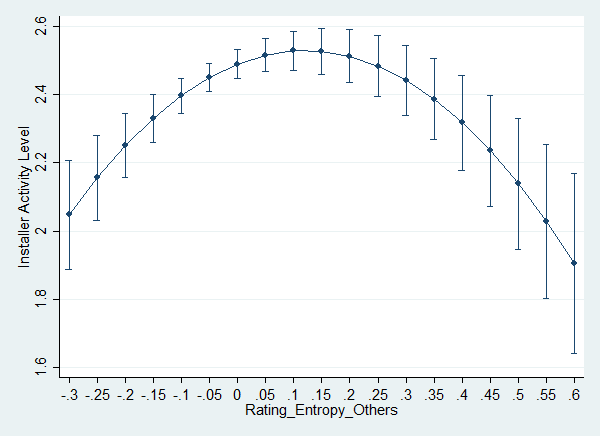

In [8]:
qui: areg  f.log_quotes    avg_v2     reviews_ct  avgmean_others ent_others_demean c.ent_others_demean#c.ent_others_demean ent_self_demean ent_self_demean_sq  log_experience temp_own_price_diff_other missing_price_info log_zip_rev i.state_n*, absorb(installer_id)
qui: margins , at(ent_others_demean=(-0.3(0.05)0.6))
marginsplot,ytitle("Installer Activity Level") title("") 

In [9]:
su ent_self


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
    ent_self |      4,900    .0937851    .2147703          0   1.209574


In [10]:
su ent_self_demean


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
ent_self_d~n |      4,900   -1.96e-09    .2147703  -.0937851   1.115789






  Variables that uniquely identify margins: ent_self_demean


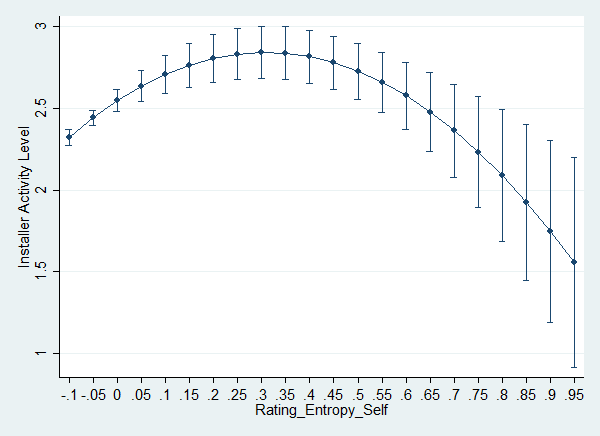

In [11]:
qui: areg  f.log_quotes    avg_v2     reviews_ct  avgmean_others ent_others_demean c.ent_others_demean#c.ent_others_demean ent_self_demean c.ent_self_demean#c.ent_self_demean  log_experience temp_own_price_diff_other missing_price_info log_zip_rev, absorb(installer_id)
qui: margins , at(ent_self_demean=(-0.1(0.05)0.95))
marginsplot, ytitle("Installer Activity Level")  title("") 

## summary stats associated with regular regressions 

In [166]:
set matsize 2000

In [172]:
restore

In [242]:
global iv_0_demean "avg_v2_demean missing_avg reviews_ct  avgmean_others_demean   log_experience temp_own_price_diff_other missing_price_info log_zip_rev i.state_n "  
 
eststo clear 
preserve
drop if ent_others_demean==.
qui:areg f.log_quotes  $iv_12_demean  , absorb( installer_id) vce(robust)
eststo filter
keep if _est_filter==1
keep  ent_self ent_others avg_v2 avgmean_others reviews_ct log_experience temp_own_price_diff_other log_zip_rev 
outreg2 using summarystats_ind.doc, replace label sum(log) keep (ent_self ent_others avg_v2 avgmean_others reviews_ct log_experience temp_own_price_diff_other log_zip_rev)
asdoc cor   ent_self ent_others avg_v2 avgmean_others reviews_ct log_experience temp_own_price_diff_other log_zip_rev,label replace
restore





(2,628 observations deleted)



(700 observations deleted)



    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
  reviews_ct |      4,200    5.290476    6.696311          0         51
avgmean_ot~s |      4,200    4.882565     .199749          1          5
  ent_others |      4,200    .2253035    .1840557          0          1
    ent_self |      4,200    .0971725    .2155222          0          1
log_experi~e |      4,200    1.738595    .9378291          0   3.713572
-------------+---------------------------------------------------------
temp_own_p~r |      4,200   -.0360107    .4010961  -2.171179   3.139395
      avg_v2 |      4,200    4.521695    1.334057          0          5
 log_zip_rev |      4,200    12.71966    7.663173          0   22.30267


summarystats_ind.doc
dir : seeout

(obs=4,200)

             | ent_self ent_ot~s   avg_v2 avgmea~s review~t log_ex~e temp_o~r log_zi~v
-----

# with text-based measures

In [6]:
replace text_d_others_p50_demean=0 if (text_d_others_p50_demean==.&ent_others_demean!=.)

(380 real changes made)


In [7]:
replace avgmean_others_demean=avg_sent_score_others_demean if avgmean_others_demean==.

(1,422 real changes made)


In [89]:
restore

## Text-based measures regression

In [211]:
su avg_v2


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
      avg_v2 |      7,528     2.94469    2.408628          0          5


In [210]:
su avg_v2_demean


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
avg_v2_dem~n |      7,528   -.0144869    1.003542  -1.241377   .8418475


In [204]:
global iv_text1_demean "avg_v2_demean  c.avg_v2_demean#c.avg_v2_demean  missing_avg reviews_ct  avgmean_others_demean  text_d_others_p50_demean text_d_self_p50_demean log_experience temp_own_price_diff_other missing_price_info log_zip_rev i.state_n "  
global iv_text2_demean "avg_sent_score_demean  c.avg_sent_score_demean#c.avg_sent_score_demean  missing_avg_sent reviews_ct  avg_sent_score_others_demean  text_d_others_p50_demean text_d_self_p50_demean log_experience temp_own_price_diff_other missing_price_info log_zip_rev i.state_n "  

preserve
drop if text_d_self_p50_demean==.
drop if text_d_others_p50_demean==.
drop if ent_others_demean==.
 
eststo clear 
drop if ent_others_demean==.
 
qui:areg f.log_quotes $iv_text1_demean c.text_d_others_p50_demean#c.text_d_others_p50_demean c.text_d_self_p50_demean#c.text_d_self_p50_demean,  absorb(installer_id) vce(robust)
eststo
 
qui:areg f.log_quotes $iv_text2_demean c.text_d_others_p50_demean#c.text_d_others_p50_demean  c.text_d_self_p50_demean#c.text_d_self_p50_demean , absorb(installer_id) vce(robust)
eststo 
 
qui: areg f.log_quotes $iv_text2_demean c.text_d_others_p50_demean#c.text_d_others_p50_demean  c.text_d_self_p50_demean#c.text_d_self_p50_demean ent_self_demean c.ent_self_demean#c.ent_self_demean ent_others_demean c.ent_others_demean#c.ent_others_demean, absorb(installer_id) vce(robust)
eststo

qui: areg f.log_quotes $iv_text1_demean c.text_d_others_p50_demean#c.text_d_others_p50_demean  c.text_d_self_p50_demean#c.text_d_self_p50_demean ent_self_demean c.ent_self_demean#c.ent_self_demean ent_others_demean c.ent_others_demean#c.ent_others_demean, absorb(installer_id) vce(robust)
eststo

esttab est1 est2 est3 est4 ,  order(text_d_self_p50_demean* c.text_d_self_p50_demean* text_d_others_p50_demean c.text_d_others* ent_self* c.ent_self* ent_other* c.ent_other*   avg* ) p  scalars(r2 aic bic) label  drop(*state* missing* c.avg_v2* c.avg_sent* )
restore 
esttab est1 est2 est3 est4 using reg_ind_withtext.csv , replace  order(text_d*self* c.text_d*self* text_d*other* c.text_d_others* avg* ent_self* c.ent_self* ent_other* c.ent_other* ) p  scalars(r2 aic bic) label  drop(*state* missing* c.avg_v2* c.avg_sent* )






(0 observations deleted)

(1,086 observations deleted)

(1,542 observations deleted)


(0 observations deleted)


(est1 stored)


(est2 stored)


(est3 stored)


(est4 stored)


------------------------------------------------------------------------------------
                              (1)             (2)             (3)             (4)   
                     F.Installe~l    F.Installe~l    F.Installe~l    F.Installe~l   
------------------------------------------------------------------------------------
Text-based_Entropy~f        5.326***        5.389***        5.014***        4.890***
                          (0.000)         (0.000)         (0.000)         (0.000)   

Text-based_Entropy~b       -23.71***       -23.54***       -20.29***       -20.40***
                          (0.000)         (0.000)         (0.000)         (0.000)   

Text-based_Entropy~s       -1.288          -0.989          -1.640          -1.955   
                          (0.389)         (0.509)  

In [244]:
global iv_text1  "avg_v2   c.avg_v2#c.avg_v2  missing_avg reviews_ct  avgmean_others  text_d_others_p50_demean text_d_self_p50_demean log_experience temp_own_price_diff_other missing_price_info log_zip_rev i.state_n "  
global iv_text2  "avg_sent_score   c.avg_sent_score#c.avg_sent_score  missing_avg_sent reviews_ct  avg_sent_score_others  text_d_others_p50_demean text_d_self_p50_demean log_experience temp_own_price_diff_other missing_price_info log_zip_rev i.state_n "  

preserve
drop if text_d_self_p50_demean==.
drop if text_d_others_p50_demean==.
drop if ent_others_demean==.
 
eststo clear 
drop if ent_others_demean==.
 
qui:areg f.log_quotes $iv_text1 c.text_d_others_p50_demean#c.text_d_others_p50_demean c.text_d_self_p50_demean#c.text_d_self_p50_demean,  absorb(installer_id) vce(robust)
eststo
 
qui:areg f.log_quotes $iv_text2 c.text_d_others_p50_demean#c.text_d_others_p50_demean  c.text_d_self_p50_demean#c.text_d_self_p50_demean , absorb(installer_id) vce(robust)
eststo 
 
qui: areg f.log_quotes $iv_text2 c.text_d_others_p50_demean#c.text_d_others_p50_demean  c.text_d_self_p50_demean#c.text_d_self_p50_demean ent_self_demean c.ent_self_demean#c.ent_self_demean ent_others_demean c.ent_others_demean#c.ent_others_demean, absorb(installer_id) vce(robust)
eststo

qui: areg f.log_quotes $iv_text1 c.text_d_others_p50_demean#c.text_d_others_p50_demean  c.text_d_self_p50_demean#c.text_d_self_p50_demean ent_self_demean c.ent_self_demean#c.ent_self_demean ent_others_demean c.ent_others_demean#c.ent_others_demean, absorb(installer_id) vce(robust)
eststo

esttab est1 est2 est3 est4 ,  order(text_d_self_p50_demean* c.text_d_self_p50_demean* text_d_others_p50_demean c.text_d_others* ent_self* c.ent_self* ent_other* c.ent_other*   avg* ) p  scalars(r2 aic bic) label  drop(*state* missing* c.avg_v2* c.avg_sent* )
restore 
//esttab est1 est2 est3 est4 using reg_ind_withtext.csv , replace  order(text_d*self* c.text_d*self* text_d*other* c.text_d_others* avg* ent_self* c.ent_self* ent_other* c.ent_other* ) p  scalars(r2 aic bic) label  drop(*state* missing* c.avg_v2* c.avg_sent* )






(0 observations deleted)

(1,466 observations deleted)

(1,542 observations deleted)


(0 observations deleted)


(est1 stored)


(est2 stored)


(est3 stored)


(est4 stored)


------------------------------------------------------------------------------------
                              (1)             (2)             (3)             (4)   
                     F.Installe~l    F.Installe~l    F.Installe~l    F.Installe~l   
------------------------------------------------------------------------------------
Text-based_Entropy~f        4.338***        4.489***        4.022***        3.860***
                          (0.000)         (0.000)         (0.000)         (0.000)   

Text-based_Entropy~b       -21.40***       -19.92***       -16.20***       -17.57***
                          (0.000)         (0.000)         (0.000)         (0.000)   

Text-based_Entropy~s       -0.790          -0.728          -1.473          -1.579   
                          (0.628)         (0.648)  

## Hausman for Text-based 

In [12]:
xtset

       panel variable:  installer_id (unbalanced)
        time variable:  year_month_~t, 1 to 64
                delta:  1 unit


In [222]:
eststo clear

qui: xtreg f.log_quotes $iv_text1_demean c.text_d_others_p50_demean#c.text_d_others_p50_demean  c.text_d_self_p50_demean#c.text_d_self_p50_demean ent_self_demean c.ent_self_demean#c.ent_self_demean ent_others_demean c.ent_others_demean#c.ent_others_demean, fe
estimates store fixed 
qui: xtreg f.log_quotes $iv_text1_demean c.text_d_others_p50_demean#c.text_d_others_p50_demean  c.text_d_self_p50_demean#c.text_d_self_p50_demean ent_self_demean c.ent_self_demean#c.ent_self_demean ent_others_demean c.ent_others_demean#c.ent_others_demean, re
estimates store random
hausman fixed random








Note: the rank of the differenced variance matrix (16) does not equal the number of coefficients being tested
        (17); be sure this is what you expect, or there may be problems computing the test.  Examine the output
        of your estimators for anything unexpected and possibly consider scaling your variables so that the
        coefficients are on a similar scale.

                 ---- Coefficients ----
             |      (b)          (B)            (b-B)     sqrt(diag(V_b-V_B))
             |     fixed        random       Difference          S.E.
-------------+----------------------------------------------------------------
avg_v2_dem~n |   -.9898236    -.8370526        -.152771        .0504453
          c. |
avg_v2_dem~n#|
          c. |
avg_v2_dem~n |    .8179299      .623803        .1941269         .078532
 missing_avg |   -2.339702    -1.867016       -.4726864        .1274904
  reviews_ct |    .0371159     .0385786       -.0014627        .0015464
avgmean_ot~n |   

## Text-based measures summary stats 

In [117]:
restore

In [121]:
tab _est_filter


  esample() |
       from |
  estimates |
      store |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |      2,966       39.40       39.40
          1 |      4,562       60.60      100.00
------------+-----------------------------------
      Total |      7,528      100.00


In [123]:
restore

In [124]:
xtset

       panel variable:  installer_id (unbalanced)
        time variable:  year_month_~t, 1 to 64
                delta:  1 unit


In [126]:
restore

In [255]:
su avg_sent*


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
avg_sent_s~e |      7,528    .4119695    .3577352     -.8268      .9576
avg_sent_s~t |      7,528    .5938574    .2537537          0    .886075
avg_sent_s~s |      7,528    .5615071    .2830419     -.5994      .9576
avg~e_demean |      7,528   -3.90e-08    .3577352   -1.23877   .5456305
avg_sent_s.. |      7,528    2.20e-08    .2830419  -1.160907   .3960929


In [260]:
su avg_sent_score avg_sent_score_others if ent_mkt!=.


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
avg_sent_s~e |      4,900    .6329196    .2382276     -.8268      .9576
avg_sent_s~s |      4,900    .6290902    .2028872     -.5994      .9576


In [249]:
br

In [128]:
global iv_text1_demean "avg_v2_demean  c.avg_v2_demean#c.avg_v2_demean  missing_avg reviews_ct  avgmean_others_demean  text_d_others_p50_demean text_d_self_p50_demean log_experience temp_own_price_diff_other missing_price_info log_zip_rev i.state_n "  
global iv_text2_demean "avg_sent_score_demean  c.avg_sent_score_demean#c.avg_sent_score_demean  missing_avg_sent reviews_ct  avg_sent_score_others_demean  text_d_others_p50_demean text_d_self_p50_demean log_experience temp_own_price_diff_other missing_price_info log_zip_rev i.state_n "  

preserve
drop if text_d_self_p50_demean==.
drop if text_d_others_p50_demean==.
drop if ent_others_demean==.
eststo clear
qui: areg f.log_quotes $iv_text2_demean c.text_d_others_p50_demean#c.text_d_others_p50_demean  c.text_d_self_p50_demean#c.text_d_self_p50_demean ent_self_demean c.ent_self_demean#c.ent_self_demean ent_others_demean c.ent_others_demean#c.ent_others_demean, absorb(installer_id) vce(robust)
eststo filter
keep if _est_filter==1 
outreg2 using summarystats_ind_textbased.doc, replace label sum(log) keep (avg_sent_score_demean avg_sent_score_others_demean  text_d_others_p50_demean text_d_self_p50_demean reviews_ct log_experience temp_own_price_diff_other log_zip_rev)
asdoc cor avg_sent_score_demean avg_sent_score_others_demean  text_d_others_p50_demean text_d_self_p50_demean reviews_ct log_experience temp_own_price_diff_other log_zip_rev,label replace
restore





(0 observations deleted)

(1,086 observations deleted)

(1,542 observations deleted)




(338 observations deleted)


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
         avg |      4,215    4.884829    .3934907          1          5
avg_sent_s~e |      4,562    .6331575     .239058     -.8268      .9576
        five |      4,562     4.81587    6.106368          0         46
        four |      4,562    .1587023    .5450741          0          5
installer_id |      4,562    18397.27    6485.077        363      23027
-------------+---------------------------------------------------------
      market |      4,562    19.47063    12.95797          0         36
         one |      4,562    .0819816    .3987865          0          5
quotes_count |      4,562    41.74178    99.22391          0       1417
  reviews_ct |      4,562    5.112012    6.509968          0         51
       three |

In [51]:
global iv_text1_demean "avg_v2_demean  c.avg_v2_demean#c.avg_v2_demean  missing_avg reviews_ct  avgmean_others_demean  text_d_others_p50_demean text_d_self_p50_demean log_experience temp_own_price_diff_other missing_price_info log_zip_rev i.state_n "  
global iv_text2_demean "avg_sent_score_demean  c.avg_sent_score_demean#c.avg_sent_score_demean  missing_avg_sent reviews_ct  avg_sent_score_others_demean  text_d_others_p50_demean text_d_self_p50_demean log_experience temp_own_price_diff_other missing_price_info log_zip_rev i.state_n "  

preserve
drop if text_d_self_p50_demean==.
drop if text_d_others_p50_demean==.
drop if ent_others_demean==.
eststo clear
su 
qui: areg f.log_quotes $iv_text2_demean c.text_d_others_p50_demean#c.text_d_others_p50_demean  c.text_d_self_p50_demean#c.text_d_self_p50_demean ent_self_demean c.ent_self_demean#c.ent_self_demean ent_others_demean c.ent_others_demean#c.ent_others_demean, absorb(installer_id) vce(robust)
eststo filter
keep if _est_filter==1 
//outreg2 using summarystats_ind_textbased.doc, replace label sum(log) keep (avg_sent_score_demean avg_sent_score_others_demean  text_d_others_p50_demean text_d_self_p50_demean reviews_ct log_experience temp_own_price_diff_other log_zip_rev)
asdoc cor avg_sent_score_demean avg_v2 avg_sent_score_others_demean avgmean_others  text_d_others_p50_demean ent_others_demean text_d_self_p50_demean ent_self_demean ,label replace
restore





(0 observations deleted)

(1,086 observations deleted)

(1,542 observations deleted)




(338 observations deleted)

(obs=4,200)

             | avg_se..   avg_v2 avg_se.. avgmea~s text_d.. ent_ot~n text_d.. ent_se~n
-------------+------------------------------------------------------------------------
avg~e_demean |   1.0000
      avg_v2 |   0.8323   1.0000
avg_sent_s.. |  -0.0361  -0.0736   1.0000
avgmean_ot~s |  -0.0730  -0.0232   0.4335   1.0000
text_d_oth.. |  -0.0638   0.0046  -0.0323  -0.0759   1.0000
ent_others~n |   0.1221   0.0698  -0.0888  -0.5270   0.0806   1.0000
text_d_sel.. |   0.0998   0.1364  -0.0892  -0.0026  -0.0906   0.0088   1.0000
ent_self_d~n |  -0.0809  -0.0856   0.0637   0.0231   0.0262  -0.0890   0.3040   1.0000

(note: file Myfile.doc not found)
Click to Open File:  Myfile.doc



In [56]:
corr ent_others text_d_others_p50

(obs=4,520)

             | ent_ot~s te~s_p50
-------------+------------------
  ent_others |   1.0000
text_d_ot~50 |   0.0647   1.0000



## Make variables for spline regression

- three knots 

In [24]:
drop ent_*spl*

In [97]:
mkspline ent_other_spl_2 2=ent_others,displayknots
mkspline ent_self_spl_2 2=ent_self, displayknots



             |     knot1 
-------------+-----------
  ent_others |        .5 


             |     knot1 
-------------+-----------
    ent_self |        .5 


In [98]:
mkspline ent_other_spl_3 3=ent_others,displayknots
mkspline ent_self_spl_3 3=ent_self, displayknots



             |     knot1      knot2 
-------------+----------------------
  ent_others |  .3333333   .6666667 


             |     knot1      knot2 
-------------+----------------------
    ent_self |  .3333333   .6666667 


In [99]:
label variable ent_other_spl_31 "Rating_Entropy_Others_1"
label variable ent_other_spl_32 "Rating_Entropy_Others_2"
label variable ent_other_spl_33 "Rating_Entropy_Others_3"
label variable ent_other_spl_21 "Rating_Entropy_Others_1"
label variable ent_other_spl_22 "Rating_Entropy_Others_2"

In [100]:
label variable ent_self_spl_31 "Rating_Entropy_Self_1"
label variable ent_self_spl_32 "Rating_Entropy_Self_2"
label variable ent_self_spl_33 "Rating_Entropy_Self_3"
label variable ent_self_spl_21 "Rating_Entropy_Self_1"
label variable ent_self_spl_22 "Rating_Entropy_Self_2"

In [101]:
su ent_other_spl_3*


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
ent_other~31 |      4,900    .1816014    .1310231          0   .3333333
ent_other~32 |      4,900    .0238566    .0723667          0   .3333333
ent_other~33 |      4,900    .0042249    .0318786          0   .3333333


In [115]:
eststo clear
qui: areg f.log_quotes avg_v2_demean missing_avg reviews_ct  avgmean_others_demean   ent_other_spl_2* ent_self_demean    c.ent_self_demean#c.ent_self_demean log_experience temp_own_price_diff_other missing_price_info log_zip_rev i.state_n, absorb( installer_id) vce(robust) 
eststo
qui: areg f.log_quotes avg_v2_demean missing_avg reviews_ct  avgmean_others_demean   ent_self_spl_2* ent_others_demean c.ent_others_demean#c.ent_others_demean   log_experience temp_own_price_diff_other missing_price_info log_zip_rev i.state_n, absorb( installer_id) vce(robust) 
eststo
qui: areg f.log_quotes avg_v2_demean missing_avg reviews_ct  avgmean_others_demean   ent_other_spl_3* ent_self_demean    c.ent_self_demean#c.ent_self_demean log_experience temp_own_price_diff_other missing_price_info log_zip_rev i.state_n, absorb( installer_id) vce(robust) 
eststo
qui: areg f.log_quotes avg_v2_demean missing_avg reviews_ct  avgmean_others_demean   ent_self_spl_3* ent_others_demean c.ent_others_demean#c.ent_others_demean   log_experience temp_own_price_diff_other missing_price_info log_zip_rev i.state_n, absorb( installer_id) vce(robust) 
eststo
esttab,  keep(ent*spl*) order( ent_other_spl_2* ent_self_spl_2*)  p  label  scalars(r2 aic bic)
esttab using spline_reg.csv,  keep(ent*spl*) order( ent_other_spl_2* ent_self_spl_2*)  p    label  scalars(r2 aic bic) replace




(est1 stored)


(est2 stored)


(est3 stored)


(est4 stored)


------------------------------------------------------------------------------------
                              (1)             (2)             (3)             (4)   
                     F.Installe~l    F.Installe~l    F.Installe~l    F.Installe~l   
------------------------------------------------------------------------------------
Rating_Entropy_Oth~1        0.512*                                                  
                          (0.013)                                                   

Rating_Entropy_Oth~2       -1.934***                                                
                          (0.000)                                                   

Rating_Entropy_Sel~1                        1.200***                                
                                          (0.000)                                   

Rating_Entropy_Sel~2                       -3.072***                            

## Dynamic Panel 

 
xtabond  f.log_quotes l(0/1).avg_v2 l(0/2).reviews_ct  l(0/2).avgmean_others ent_others ent_others_sq ent_self_demean ent_self_demean_sq  log_experience temp_own_price_diff_other missing_price_info log_zip_rev  , lags(2)  twostep noconstant

In [141]:
estat sargan

Sargan test of overidentifying restrictions
        H0: overidentifying restrictions are valid

        chi2(1525)   =  238.2181
        Prob > chi2  =    1.0000


In [13]:
 
xtabond  f.log_quotes l(0/1).avg_v2 l(0/2).reviews_ct  l(0/2).avgmean_others  , lags(2) pre( ent_others_demean ent_others_demean_sq ent_self_demean ent_self_demean_sq  log_experience temp_own_price_diff_other missing_price_info log_zip_rev) twostep noconstant

In [15]:
br

In [23]:
eststo clear
xtabond  f.log_quotes   avg_v2     reviews_ct  avgmean_others     log_experience temp_own_price_diff_other missing_price_info log_zip_rev , nocons vce(robust) lags(2) two 
eststo 
xtabond  f.log_quotes   avg_v2     reviews_ct  avgmean_others   ent_self_demean ent_self_demean_sq log_experience temp_own_price_diff_other missing_price_info log_zip_rev , nocons vce(robust) lags(2) two 
eststo 
xtabond  f.log_quotes   avg_v2     reviews_ct  avgmean_others  ent_others_demean ent_others_demean_sq ent_self_demean ent_self_demean_sq log_experience temp_own_price_diff_other missing_price_info log_zip_rev , nocons vce(robust) lags(2) two 
eststo 





Arellano-Bond dynamic panel-data estimation     Number of obs     =      5,209
Group variable: installer_id                    Number of groups  =        300
Time variable: year_month~t
                                                Obs per group:
                                                              min =          1
                                                              avg =   17.36333
                                                              max =         56

Number of instruments =   1.8e+03               Wald chi2(9)      =     610.96
                                                Prob > chi2       =     0.0000
Two-step results
                                        (Std. Err. adjusted for clustering on installer_id)
-------------------------------------------------------------------------------------------
                          |              WC-Robust
             F.log_quotes |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
--------

In [25]:
xtabond  f.log_quotes   avg_v2     reviews_ct  avgmean_others     log_experience temp_own_price_diff_other missing_price_info log_zip_rev if (ent_others_demean!=.&ent_self_demean!=.), nocons vce(robust) lags(2) two 
eststo



Arellano-Bond dynamic panel-data estimation     Number of obs     =      3,869
Group variable: installer_id                    Number of groups  =        282
Time variable: year_month~t
                                                Obs per group:
                                                              min =          1
                                                              avg =   13.71986
                                                              max =         55

Number of instruments =   1.6e+03               Wald chi2(9)      =     299.91
                                                Prob > chi2       =     0.0000
Two-step results
                                        (Std. Err. adjusted for clustering on installer_id)
-------------------------------------------------------------------------------------------
                          |              WC-Robust
             F.log_quotes |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
---------

In [27]:
xtabond  f.log_quotes   avg_v2     reviews_ct  avgmean_others    ent_others_demean ent_others_demean_sq log_experience temp_own_price_diff_other missing_price_info log_zip_rev if (ent_others_demean!=.&ent_self_demean!=.), nocons vce(robust) lags(2) two 
eststo



Arellano-Bond dynamic panel-data estimation     Number of obs     =      3,757
Group variable: installer_id                    Number of groups  =        277
Time variable: year_month~t
                                                Obs per group:
                                                              min =          1
                                                              avg =   13.56318
                                                              max =         55

Number of instruments =   1.6e+03               Wald chi2(11)     =     351.74
                                                Prob > chi2       =     0.0000
Two-step results
                                        (Std. Err. adjusted for clustering on installer_id)
-------------------------------------------------------------------------------------------
                          |              WC-Robust
             F.log_quotes |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
---------

In [38]:
xtabond  f.log_quotes   avg_v2     reviews_ct  avgmean_others    ent_self_demean ent_self_demean_sq ent_others  ent_others_sq log_experience temp_own_price_diff_other missing_price_info log_zip_rev if (ent_others_demean!=.&ent_self_demean!=.), nocons vce(robust) lags(2) two 
eststo



Arellano-Bond dynamic panel-data estimation     Number of obs     =      3,757
Group variable: installer_id                    Number of groups  =        277
Time variable: year_month~t
                                                Obs per group:
                                                              min =          1
                                                              avg =   13.56318
                                                              max =         55

Number of instruments =   1.6e+03               Wald chi2(13)     =     368.63
                                                Prob > chi2       =     0.0000
Two-step results
                                        (Std. Err. adjusted for clustering on installer_id)
-------------------------------------------------------------------------------------------
                          |              WC-Robust
             F.log_quotes |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
---------

In [36]:
esttab,  order(  log_quotes l.log_quotes ent_self* c.ent_self* ent_other* c.ent_other* avg_v2  avgmean_others ) drop(  missing* ) p  label    



------------------------------------------------------------------------------------------------------------------------------------
                              (1)             (2)             (3)             (4)             (5)             (6)             (7)   
                     F.Installe~l    F.Installe~l    F.Installe~l    F.Installe~l    F.Installe~l    F.Installe~l    F.Installe~l   
------------------------------------------------------------------------------------------------------------------------------------
Installer Activity~l        0.530***        0.509***        0.502***        0.510***        0.510***        0.507***        0.507***
                          (0.000)         (0.000)         (0.000)         (0.000)         (0.000)         (0.000)         (0.000)   

L.Installer Activi~l       0.0640**        0.0363          0.0369          0.0393          0.0393          0.0374          0.0374   
                          (0.003)         (0.176)         (0.158)  

In [39]:
esttab using ind_dynamic2.csv,  order(  log_quotes l.log_quotes ent_self* c.ent_self* ent_other* c.ent_other* avg_v2  avgmean_others ) drop(  missing* ) p  label    


(output written to ind_dynamic2.csv)


## IV 2sls 

In [76]:
ivregress 2sls  f.log_quotes (log_quotes l.log_quotes  = l.avg_v2 l.reviews_ct l.temp_own_price_diff_other l.missing_price_info l.log_zip_rev )  avg_v2 reviews_ct temp_own_price_diff_other missing_price_info  avgmean_others ent_others ent_others_sq ent_self_demean ent_self_demean_sq  log_experience   ,    noconstant


Instrumental variables (2SLS) regression          Number of obs   =      4,057
                                                  Wald chi2(12)   =          .
                                                  Prob > chi2     =          .
                                                  R-squared       =          .
                                                  Root MSE        =     .95114

-------------------------------------------------------------------------------------------
             F.log_quotes |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
--------------------------+----------------------------------------------------------------
               log_quotes |
                      --. |   .5580052   .1741672     3.20   0.001     .2166438    .8993667
                      L1. |   .1635198   .2479402     0.66   0.510     -.322434    .6494737
                          |
                   avg_v2 |  -.0394202   .0175107    -2.25   0.024    -.0737406   -.005

In [77]:
estat overid


  Tests of overidentifying restrictions:

  Sargan (score) chi2(3) =  5.16537  (p = 0.1601)
  Basmann chi2(3)        =  5.15283  (p = 0.1609)


## Dynamic Panel - overidentifying test

In [45]:
 
xtdpd  f.log_quotes avg_v2  reviews_ct  avgmean_others ent_others ent_others_sq ent_self_demean ent_self_demean_sq  log_experience temp_own_price_diff_other missing_price_info log_zip_rev  , twostep  noconstant   dgmmiv(l2.(log_quotes reviews_ct)) lgmmiv(l.log_quotes l2.log_quotes)

estat sargan


option maxldep(3) not allowed


r(198);
r(198);


In [79]:
 
xtdpd  f.log_quotes avg_v2  reviews_ct  avgmean_others ent_others ent_others_sq ent_self_demean ent_self_demean_sq  log_experience temp_own_price_diff_other missing_price_info log_zip_rev  , twostep  noconstant dgmmiv(l2.(log_quotes)) lgmmiv(l.log_quotes l2.log_quotes l.reviews_ct avgmean_others ent_others ent_others_sq ent_self_demean ent_self_demean_sq  log_experience temp_own_price_diff_other)

estat sargan



Dynamic panel-data estimation                   Number of obs     =      4,200
Group variable: installer_id                    Number of groups  =        310
Time variable: year_month~t
                                                Obs per group:
                                                              min =          1
                                                              avg =   13.54839
                                                              max =         56

Number of instruments =   1.8e+03               Wald chi2(11)     =   1.51e+09
                                                Prob > chi2       =     0.0000
Two-step results
-------------------------------------------------------------------------------------------
             F.log_quotes |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
--------------------------+----------------------------------------------------------------
                   avg_v2 |  -.0798048   .0006545  -121.93  

In [47]:
xtabond f.log_quotes  ent_others ent_others_sq ent_self_demean ent_self_demean_sq avg_v2  reviews_ct  avgmean_others  log_experience temp_own_price_diff_other missing_price_info log_zip_re ,lags(2) noconstant maxlag(2) 


Arellano-Bond dynamic panel-data estimation     Number of obs     =      3,757
Group variable: installer_id                    Number of groups  =        277
Time variable: year_month~t
                                                Obs per group:
                                                              min =          1
                                                              avg =   13.56318
                                                              max =         55

Number of instruments =   1.6e+03               Wald chi2(13)     =     838.71
                                                Prob > chi2       =     0.0000
One-step results
-------------------------------------------------------------------------------------------
             F.log_quotes |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
--------------------------+----------------------------------------------------------------
               log_quotes |
                      --. |   .50

In [149]:
xtabond f.log_quotes  ent_others_demean ent_others_demean_sq ent_self_demean ent_self_demean_sq avg_v2  reviews_ct  avgmean_others  log_experience temp_own_price_diff_other missing_price_info log_zip_re ,lags(2) noconstant 


Arellano-Bond dynamic panel-data estimation     Number of obs     =      3,757
Group variable: installer_id                    Number of groups  =        277
Time variable: year_month~t
                                                Obs per group:
                                                              min =          1
                                                              avg =   13.56318
                                                              max =         55

Number of instruments =   1.6e+03               Wald chi2(13)     =     838.83
                                                Prob > chi2       =     0.0000
One-step results
-------------------------------------------------------------------------------------------
             F.log_quotes |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
--------------------------+----------------------------------------------------------------
               log_quotes |
                      --. |   .50

In [150]:
xtabond f.log_quotes  ent_others_demean ent_others_demean_sq ent_self_demean ent_self_demean_sq avg_v2  reviews_ct  avgmean_others  log_experience temp_own_price_diff_other missing_price_info log_zip_re ,lags(2) noconstant  twostep
estat sargan



Arellano-Bond dynamic panel-data estimation     Number of obs     =      3,757
Group variable: installer_id                    Number of groups  =        277
Time variable: year_month~t
                                                Obs per group:
                                                              min =          1
                                                              avg =   13.56318
                                                              max =         55

Number of instruments =   1.6e+03               Wald chi2(13)     =   5.22e+06
                                                Prob > chi2       =     0.0000
Two-step results
-------------------------------------------------------------------------------------------
             F.log_quotes |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
--------------------------+----------------------------------------------------------------
               log_quotes |
                      --. |   .5

In [48]:
estat sargan

Sargan test of overidentifying restrictions
        H0: overidentifying restrictions are valid

        chi2(1542)   =  1745.137
        Prob > chi2  =    0.0002


In [50]:
estat abond


Arellano-Bond test for zero autocorrelation in first-differenced errors
  +-----------------------+
  |Order |  z     Prob > z|
  |------+----------------|
  |   1  |-33.299  0.0000 |
  |   2  |-.89457  0.3710 |
  +-----------------------+
   H0: no autocorrelation 


In [137]:
reg f.log_quotes  l.log_quotes l.avg_v2 l.reviews_ct  l.avgmean_others  l.log_experience l.temp_own_price_diff_other l.missing_price_info l.log_zip_rev l2.log_zip_rev ,noconstant 


      Source |       SS           df       MS      Number of obs   =     5,221
-------------+----------------------------------   F(9, 5212)      =   2868.89
       Model |  32371.8094         9  3596.86771   Prob > F        =    0.0000
    Residual |  6534.53295     5,212  1.25374769   R-squared       =    0.8320
-------------+----------------------------------   Adj R-squared   =    0.8318
       Total |  38906.3423     5,221  7.45189471   Root MSE        =    1.1197

-------------------------------------------------------------------------------------------
             F.log_quotes |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
--------------------------+----------------------------------------------------------------
               log_quotes |
                      L1. |   .7238709   .0100908    71.74   0.000     .7040887    .7436531
                          |
                   avg_v2 |
                      L1. |    .002436   .0075531     0.32   0.747    -.

In [139]:
test  l.log_quotes


 ( 1)  L.log_quotes = 0

       F(  1,  5212) = 5146.00
            Prob > F =    0.0000


In [140]:
test l.reviews_ct


 ( 1)  L.reviews_ct = 0

       F(  1,  5212) =   58.56
            Prob > F =    0.0000


In [141]:
test l.avgmean_others


 ( 1)  L.avgmean_others = 0

       F(  1,  5212) =   66.59
            Prob > F =    0.0000


In [142]:
test l.log_experience


 ( 1)  L.log_experience = 0

       F(  1,  5212) =    0.26
            Prob > F =    0.6129


In [143]:
test l.temp_own_price_diff_other


 ( 1)  L.temp_own_price_diff_other = 0

       F(  1,  5212) =   17.02
            Prob > F =    0.0000


In [144]:
test l.log_zip_rev l2.log_zip_rev


 ( 1)  L.log_zip_rev = 0
 ( 2)  L2.log_zip_rev = 0

       F(  2,  5212) =    6.67
            Prob > F =    0.0013


In [205]:
xtabond f.log_quotes  ent_others_demean ent_others_demean_sq ent_self_demean ent_self_demean_sq avg_v2  reviews_ct   ///
avgmean_others  log_experience temp_own_price_diff_other missing_price_info log_zip_re ,lags(2) noconstant  twostep
estat sargan



Arellano-Bond dynamic panel-data estimation     Number of obs     =      3,757
Group variable: installer_id                    Number of groups  =        277
Time variable: year_month~t
                                                Obs per group:
                                                              min =          1
                                                              avg =   13.56318
                                                              max =         55

Number of instruments =   1.6e+03               Wald chi2(13)     =   4.24e+08
                                                Prob > chi2       =     0.0000
Two-step results
-------------------------------------------------------------------------------------------
             F.log_quotes |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
--------------------------+----------------------------------------------------------------
               log_quotes |
                      --. |   .5

In [207]:
xtabond f.log_quotes  ent_others_demean ent_others_demean_sq ent_self_demean ent_self_demean_sq      ///
   temp_own_price_diff_other missing_price_info log_zip_rev ,lags(2) noconstant  twostep pre(reviews_ct avg_v2 avgmean_others log_experience)
estat sargan



Arellano-Bond dynamic panel-data estimation     Number of obs     =      3,757
Group variable: installer_id                    Number of groups  =        277
Time variable: year_month~t
                                                Obs per group:
                                                              min =          1
                                                              avg =   13.56318
                                                              max =         55

Number of instruments =   3.7e+03               Wald chi2(13)     =  727533.94
                                                Prob > chi2       =     0.0000
Two-step results
-------------------------------------------------------------------------------------------
             F.log_quotes |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
--------------------------+----------------------------------------------------------------
               log_quotes |
                      --. |   .5

In [208]:
xtabond f.log_quotes  ent_others_demean ent_others_demean_sq ent_self_demean ent_self_demean_sq      ///
   temp_own_price_diff_other missing_price_info log_zip_rev ,lags(2) noconstant  twostep pre(reviews_ct avg_v2 avgmean_others log_experience) maxlags(3)
estat sargan



Arellano-Bond dynamic panel-data estimation     Number of obs     =      3,757
Group variable: installer_id                    Number of groups  =        277
Time variable: year_month~t
                                                Obs per group:
                                                              min =          1
                                                              avg =   13.56318
                                                              max =         55

Number of instruments =   1.9e+03               Wald chi2(13)     =  941804.53
                                                Prob > chi2       =     0.0000
Two-step results
-------------------------------------------------------------------------------------------
             F.log_quotes |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
--------------------------+----------------------------------------------------------------
               log_quotes |
                      --. |   .4